# <div style="text-align: center"> Proyecto Final </div>  
<div style="text-align: center"> Alejandro Alayón Suárez - 201316083</div>
___

In [253]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
import scipy
import imageio
import cv2
from scipy import misc
from scipy import ndimage
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

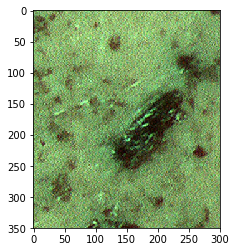

In [506]:
img = cv2.imread('Laminillas.tif')
crop = img[1250:1600,500:800]
plt.imshow(crop)
plt.show()

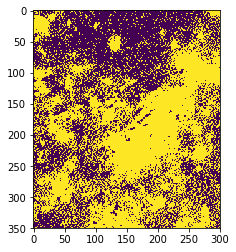

In [476]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
crop2 = thresh[1250:1600,500:800]
plt.imshow(crop2)
plt.show()

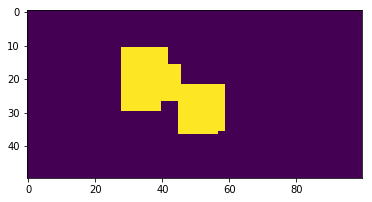

In [556]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)
crop2 = opening[520:570,1500:1600]
plt.imshow(crop2)
plt.show()

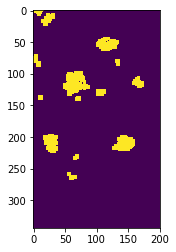

In [418]:
crop4 = opening[1600:2000,1000:1200]
plt.imshow(crop4)
plt.show()

In [421]:
a=crop4.nonzero()
b=len(crop4)
c=len(crop4[0])
d=len(a[0])
por=100*d/(b*c)
por

6.2311046511627906

In [420]:
label_im, nb_labels =scipy.ndimage.label(opening)
sizes = ndimage.sum(opening, label_im, range(nb_labels + 1))
#sizes/255
nb_labels

1395

In [359]:
a=opening.nonzero()
b=len(opening)
c=len(opening[0])
d=len(a[0])
por=100*d/(b*c)
d

389950

In [259]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [260]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [261]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

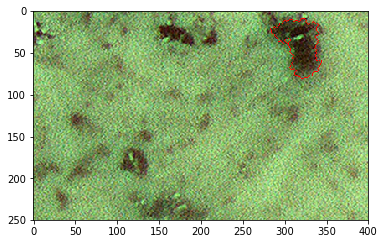

In [265]:
crop1 = img[1500:1750,1200:1600]
plt.imshow(crop1)
plt.show()

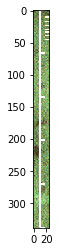

In [468]:
crop = img[634:973,20:45]
plt.imshow(crop)
plt.show()

In [523]:
scale=((1/4.5)*1000)/(973-634)
scale

0.6555227794165847

Tamaño mínimo para ser detectado por kernel 2

In [524]:
1533-1521

12

In [526]:
12*scale

7.866273352999016

Parámetros de entrada del programa
- Imagen en formato tif
- Escala o medida equivalente de cada pixel en $\mu m$
- Tamaño mínimo de particula a considerar en $\mu m$

In [473]:
def imgimport(file):
    img = cv2.imread(file+'.tif')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return gray

In [485]:
def threshold(img_gray):
    ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return ret, thresh

Definir kernel con condicional y programar opening